In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('auto_clean.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

# Handling Missing Value

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

In [7]:
df['horsepower-binned'] = df['horsepower-binned'].fillna('High')

In [8]:
# Low horsepower (48 - 101)
# Medium horsepower (102 - 155)
# High horsepower (156 - 262)

# Describe Data

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [10]:
df.describe(include='O')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


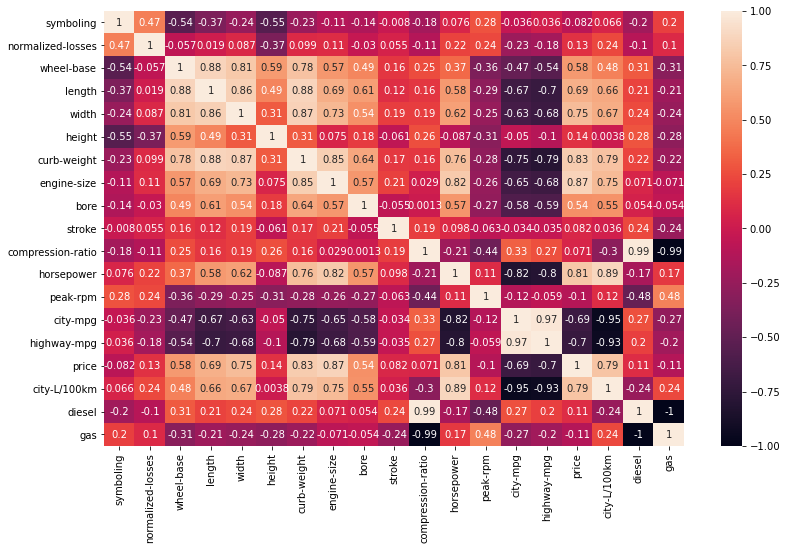

In [11]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
carDesc = []
for i in df.columns:
    carDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100),2), 
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data = carDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,symboling,int64,0,0.0,6,"[2, 3]"
1,normalized-losses,int64,0,0.0,51,"[129, 134]"
2,make,object,0,0.0,22,"[mercedes-benz, nissan]"
3,aspiration,object,0,0.0,2,"[turbo, std]"
4,num-of-doors,object,0,0.0,2,"[two, four]"
5,body-style,object,0,0.0,5,"[wagon, sedan]"
6,drive-wheels,object,0,0.0,3,"[rwd, fwd]"
7,engine-location,object,0,0.0,2,"[rear, front]"
8,wheel-base,float64,0,0.0,52,"[96.1, 113.0]"
9,length,float64,0,0.0,73,"[0.8543969245555022, 0.6948582412301778]"


In [13]:
df.drop(columns=['symboling', 'normalized-losses'], inplace=True)

In [14]:
# Bore itu diameter silindernya
# Stroke itu tinggi silindernya
# Engine Size -> Volumenya = phi * r^2 * t * jumlah silinder


In [15]:
df['engine-type'] = df['engine-type'].replace(['ohcf'],'ohc')
df['engine-type'] = df['engine-type'].replace(['ohcv'],'ohc')

In [16]:
df.head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohc,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [17]:
df_ML = df.copy()

In [18]:
df_ML.drop(columns=['wheel-base','length','width','height','peak-rpm','bore','stroke','horsepower-binned', 'city-L/100km'], inplace=True)

In [19]:
df_ML.columns

Index(['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'compression-ratio', 'horsepower',
       'city-mpg', 'highway-mpg', 'price', 'diesel', 'gas'],
      dtype='object')

# Encoding Kolom

In [20]:
# pd.crosstab(index = df['make'], columns = 'count') # One Hot Encoding

In [21]:
df_ML = pd.get_dummies(data=df_ML, columns=['make'])

In [22]:
# pd.crosstab(index = df['aspiration'], columns = 'count') # Label Encoding

In [23]:
df_ML['aspiration'] = df_ML['aspiration'].map({'std' : 0, "turbo" : 1})

In [24]:
# pd.crosstab(index = df['num-of-doors'], columns = 'count') # Label Encoding | gantinya 2 sama 4

In [25]:
df_ML['num-of-doors'] = df_ML['num-of-doors'].map({'four' : 4, "two" : 2})

In [26]:
# pd.crosstab(index = df['body-style'], columns = 'count') # One Hot Encoding

In [27]:
df_ML = pd.get_dummies(data=df_ML, columns=['body-style'])

In [28]:
# pd.crosstab(index = df['drive-wheels'], columns = 'count') # One Hot Encoding

In [29]:
df_ML = pd.get_dummies(data=df_ML, columns=['drive-wheels'])

In [30]:
# pd.crosstab(index = df['engine-location'], columns = 'count') # Label Encoding

In [31]:
df_ML['engine-location'] = df_ML['engine-location'].map({'front' : 0, "rear" : 1})

In [32]:
# pd.crosstab(index = df['engine-type'], columns = 'count') # One Hot Encoding

In [33]:
df_ML = pd.get_dummies(data=df_ML, columns=['engine-type'])

In [34]:
# pd.crosstab(index = df['num-of-cylinders'], columns = 'count') # Label Encoding

In [35]:
df_ML['num-of-cylinders'] = df_ML['num-of-cylinders'].map({'eight' : 8, "five" : 5, 'four' : 4, "six" : 6, 'three' : 3, "twelve" : 12, 'two' : 2})

In [36]:
# pd.crosstab(index = df['fuel-system'], columns = 'count') # One Hot Encoding

In [37]:
df_ML = pd.get_dummies(data=df_ML, columns=['fuel-system'])

In [38]:
df_ML.head()

,aspiration,num-of-doors,engine-location,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,2,0,2548,4,130,9.0,111.0,21,27,13495.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,0,2548,4,130,9.0,111.0,21,27,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,0,2,0,2823,6,152,9.0,154.0,19,26,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,4,0,2337,4,109,10.0,102.0,24,30,13950.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,4,0,2824,5,136,8.0,115.0,18,22,17450.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


# Model 1 - Linear Regression (Base Model)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_ML.drop(columns='price')
y = df_ML['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
Model_1 = LinearRegression()

In [44]:
Model_1.fit(X_train, y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [47]:
R2_LR_tr, MAE_LR_tr, MSE_LR_tr, RMSE_LR_tr = Eva_Matrix(Model_1, X_train, y_train)

In [48]:
R2_LR_ts, MAE_LR_ts, MSE_LR_ts, RMSE_LR_ts = Eva_Matrix(Model_1, X_test, y_test)

In [49]:
data_LR = {
    "Train" : [R2_LR_tr, MAE_LR_tr, MSE_LR_tr, RMSE_LR_tr],
    "Test" : [R2_LR_ts, MAE_LR_ts, MSE_LR_ts, RMSE_LR_ts]
}

pd.DataFrame(data = data_LR, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512219e-01,9.021514e-01
MAE,1.042615e+03,2.072544e+03
MSE,2.225564e+06,1.197146e+07
RMSE,1.491832e+03,3.459979e+03


# Scalling (Improvement)

In [50]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [51]:
sc = RobustScaler()

In [52]:
df_ML.head()

,aspiration,num-of-doors,engine-location,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,2,0,2548,4,130,9.0,111.0,21,27,13495.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,0,2548,4,130,9.0,111.0,21,27,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,0,2,0,2823,6,152,9.0,154.0,19,26,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,4,0,2337,4,109,10.0,102.0,24,30,13950.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,4,0,2824,5,136,8.0,115.0,18,22,17450.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [53]:
df_ML['compression-ratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  8.8 ,  9.5 ,  9.6 ,  9.41,
        9.4 ,  7.6 ,  7.  ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [54]:
num_col = df_ML[['curb-weight', 'num-of-cylinders', 'engine-size', 'compression-ratio' ,'horsepower', 'city-mpg', 'highway-mpg']]

In [55]:
sc_df = sc.fit_transform(num_col)

In [56]:
df_sc = pd.DataFrame(sc_df)

In [57]:
df_fullsc = pd.concat([df_ML,df_sc], axis=1)

In [58]:
df_fullsc.drop(columns=['curb-weight', 'num-of-cylinders', 'engine-size', 'compression-ratio' ,'horsepower', 'city-mpg', 'highway-mpg'], inplace=True)

In [59]:
df_fullsc.head()

,aspiration,num-of-doors,engine-location,price,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,0,1,2,3,4,5,6
0,0,2,0,13495.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.177015,0.0,0.232558,0.00,0.347826,-0.272727,-0.333333
1,0,2,0,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.177015,0.0,0.232558,0.00,0.347826,-0.272727,-0.333333
2,0,2,0,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.540291,2.0,0.744186,0.00,1.282609,-0.454545,-0.444444
3,0,4,0,13950.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.101717,0.0,-0.255814,1.25,0.152174,0.000000,0.000000
4,0,4,0,17450.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.541612,1.0,0.372093,-1.25,0.434783,-0.545455,-0.888889


# Base Model Setelah Di Scalling

In [60]:
# Splitting Data

In [61]:
X_sc = df_fullsc.drop(columns='price')
y_sc = df_fullsc['price']

In [62]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size = 0.20, random_state = 42)

In [63]:
Model_1.fit(X_train_sc, y_train_sc)

LinearRegression()

In [64]:
R2_LRsc_tr, MAE_LRsc_tr, MSE_LRsc_tr, RMSE_LRsc_tr = Eva_Matrix(Model_1, X_train_sc, y_train_sc)

In [65]:
R2_LRsc_ts, MAE_LRsc_ts, MSE_LRsc_ts, RMSE_LRsc_ts = Eva_Matrix(Model_1, X_test_sc, y_test_sc)

In [66]:
data_LRsc = {
    "Train" : [R2_LRsc_tr, MAE_LRsc_tr, MSE_LRsc_tr, RMSE_LRsc_tr],
    "Test" : [R2_LRsc_ts, MAE_LRsc_ts, MSE_LRsc_ts, RMSE_LRsc_ts]
}

pd.DataFrame(data = data_LRsc, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512219e-01,9.021514e-01
MAE,1.042615e+03,2.072544e+03
MSE,2.225564e+06,1.197146e+07
RMSE,1.491832e+03,3.459979e+03


# Polynomial Features (Improvement)

In [67]:
# Polynomial

In [68]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [69]:
X_poly = df_ML[['curb-weight', 'num-of-cylinders', 'engine-size', 'compression-ratio' ,'horsepower', 'city-mpg', 'highway-mpg']]

In [70]:
poli = PolynomialFeatures(degree=3, include_bias = False)

In [71]:
X_poly_3 = poli.fit_transform(X_poly)

In [72]:
df_Poly = pd.DataFrame(X_poly_3)
df_Poly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,2548.0,4.0,130.0,9.0,111.0,21.0,27.0,6492304.0,10192.0,331240.0,22932.0,282828.0,53508.0,68796.0,16.0,520.0,36.0,444.0,84.0,108.0,16900.0,1170.0,14430.0,2730.0,3510.0,81.00,999.0,189.0,243.0,12321.0,2331.0,2997.0,441.0,567.0,729.0,1.654239e+10,25969216.0,8.439995e+08,58430736.0,7.206457e+08,136338384.0,175292208.0,40768.0,1324960.0,91728.0,1131312.0,214032.0,275184.0,43061200.0,2981160.0,36767640.0,6956040.0,8943480.0,206388.00,2545452.0,481572.0,619164.0,31393908.0,5939388.0,7636356.0,1123668.0,1444716.0,1857492.0,64.0,2080.0,144.0,1776.0,336.0,432.0,67600.0,4680.0,57720.0,10920.0,14040.0,324.00,3996.0,756.0,972.0,49284.0,9324.0,11988.0,1764.0,2268.0,2916.0,2197000.0,152100.0,1875900.0,354900.0,456300.0,10530.00,129870.0,24570.0,31590.0,1601730.0,303030.0,389610.0,57330.0,73710.0,94770.0,729.000,8991.00,1701.00,2187.00,110889.0,20979.0,26973.0,3969.0,5103.0,6561.0,1367631.0,258741.0,332667.0,48951.0,62937.0,80919.0,9261.0,11907.0,15309.0,19683.0
1,2548.0,4.0,130.0,9.0,111.0,21.0,27.0,6492304.0,10192.0,331240.0,22932.0,282828.0,53508.0,68796.0,16.0,520.0,36.0,444.0,84.0,108.0,16900.0,1170.0,14430.0,2730.0,3510.0,81.00,999.0,189.0,243.0,12321.0,2331.0,2997.0,441.0,567.0,729.0,1.654239e+10,25969216.0,8.439995e+08,58430736.0,7.206457e+08,136338384.0,175292208.0,40768.0,1324960.0,91728.0,1131312.0,214032.0,275184.0,43061200.0,2981160.0,36767640.0,6956040.0,8943480.0,206388.00,2545452.0,481572.0,619164.0,31393908.0,5939388.0,7636356.0,1123668.0,1444716.0,1857492.0,64.0,2080.0,144.0,1776.0,336.0,432.0,67600.0,4680.0,57720.0,10920.0,14040.0,324.00,3996.0,756.0,972.0,49284.0,9324.0,11988.0,1764.0,2268.0,2916.0,2197000.0,152100.0,1875900.0,354900.0,456300.0,10530.00,129870.0,24570.0,31590.0,1601730.0,303030.0,389610.0,57330.0,73710.0,94770.0,729.000,8991.00,1701.00,2187.00,110889.0,20979.0,26973.0,3969.0,5103.0,6561.0,1367631.0,258741.0,332667.0,48951.0,62937.0,80919.0,9261.0,11907.0,15309.0,19683.0
2,2823.0,6.0,152.0,9.0,154.0,19.0,26.0,7969329.0,16938.0,429096.0,25407.0,434742.0,53637.0,73398.0,36.0,912.0,54.0,924.0,114.0,156.0,23104.0,1368.0,23408.0,2888.0,3952.0,81.00,1386.0,171.0,234.0,23716.0,2926.0,4004.0,361.0,494.0,676.0,2.249742e+10,47815974.0,1.211338e+09,71723961.0,1.227277e+09,151417251.0,207202554.0,101628.0,2574576.0,152442.0,2608452.0,321822.0,440388.0,65222592.0,3861864.0,66080784.0,8152824.0,11156496.0,228663.00,3912678.0,482733.0,660582.0,66950268.0,8260098.0,11303292.0,1019103.0,1394562.0,1908348.0,216.0,5472.0,324.0,5544.0,684.0,936.0,138624.0,8208.0,140448.0,17328.0,23712.0,486.00,8316.0,1026.0,1404.0,142296.0,17556.0,24024.0,2166.0,2964.0,4056.0,3511808.0,207936.0,3558016.0,438976.0,600704.0,12312.00,210672.0,25992.0,35568.0,3604832.0,444752.0,608608.0,54872.0,75088.0,102752.0,729.000,12474.00,1539.00,2106.00,213444.0,26334.0,36036.0,3249.0,4446.0,6084.0,3652264.0,450604.0,616616.0,55594.0,76076.0,104104.0,6859.0,9386.0,12844.0,17576.0
3,2337.0,4.0,109.0,10.0,102.0,24.0,30.0,5461569.0,9348.0,254733.0,23370.0,238374.0,56088.0,70110.0,16.0,436.0,40.0,408.0,96.0,120.0,11881.0,1090.0,11118.0,2616.0,3270.0,100.00,1020.0,240.0,300.0,10404.0,2448.0,3060.0,576.0,720.0,900.0,1.276369e+10,21846276.0,5.953110e+08,54615690.0,5.570800e+08,131077656.0,163847070.0,37392.0,1018932.0,93480.0,953496.0,224352.0,280440.0,27765897.0,2547330.0,25982766.0,6113592.0,7641990.0,233700.00,2383740.0,560880.0,701100.0,24314148.0,5720976.0,7151220.0,1346112.0,1682640.0,2103300.0,64.0,1744.0,160.0,1632.0,384.0,480.0,47524.0,4360.0,44472.0,10464.0,13080.0,400.00,4080.0,960.0,1200.0,41616.0,9792.0,12240.0,2304.0,2880.0,3600.0,1295029.0,118810.0,1211862.0,285144.0,356430.0,10900.00,11

In [73]:
df_asal = df_ML[['aspiration', 'num-of-doors', 'engine-location', 'price', 'diesel', 'gas', 'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet','make_dodge', 'make_honda', 'make_isuzu', 
                'make_jaguar', 'make_mazda','make_mercedes-benz',
                'make_mercury', 'make_mitsubishi', 'make_nissan', 
                'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault', 
                'make_saab','make_subaru', 'make_toyota', 
                'make_volkswagen', 'make_volvo', 'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
                'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
                'engine-type_dohc', 'engine-type_l', 'engine-type_ohc', 'engine-type_rotor', 
                'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi',
                'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi']]

In [74]:
df_jadipoly = pd.concat([df_asal, df_Poly],axis=1)

In [75]:
# Splitting

In [76]:
Xp = df_jadipoly.drop(columns='price')
yp = df_jadipoly['price']

In [77]:
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(Xp, yp, test_size = 0.2, random_state = 42)

In [78]:
Model_P2 = LinearRegression(fit_intercept=False)

In [79]:
Model_P2.fit(X_train_P, y_train_P)

LinearRegression(fit_intercept=False)

In [80]:
R2_Poly_train, MAE_Poly_train, MSE_Poly_train, RMSE_Poly_train = Eva_Matrix(Model_P2, X_train_P, y_train_P)

In [81]:
R2_Poly_test, MAE_Poly_test, MSE_Poly_test, RMSE_Poly_test = Eva_Matrix(Model_P2, X_test_P, y_test_P)

In [82]:
data_PL = {
    "Train" : [R2_Poly_train, MAE_Poly_train, MSE_Poly_train, RMSE_Poly_train],
    "Test" : [R2_Poly_test, MAE_Poly_test, MSE_Poly_test, RMSE_Poly_test]
}

pd.DataFrame(data = data_PL, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,0.998394,-4.274580e+05
MAE,112.837365,2.613902e+06
MSE,73263.260257,5.229823e+13
RMSE,270.671868,7.231751e+06


# Power Transformer (Improvement Polynomial)

In [83]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [84]:
num_Pow = yeo_pow.fit_transform(df_Poly)

In [85]:
df_Pow = pd.DataFrame(num_Pow)

In [86]:
df_jadipoly2 = pd.concat([df_asal, df_Pow],axis=1)

In [87]:
# Splitting

In [88]:
Xp2 = df_jadipoly2.drop(columns='price')
yp2 = df_jadipoly2['price']

In [89]:
X_train_P2, X_test_P2, y_train_P2, y_test_P2 = train_test_split(Xp2, yp2, test_size = 0.2, random_state = 42)

In [90]:
Model_P22 = LinearRegression(fit_intercept=False)

In [91]:
Model_P22.fit(X_train_P2, y_train_P2)

LinearRegression(fit_intercept=False)

In [92]:
R2_Poly_train2, MAE_Poly_train2, MSE_Poly_train2, RMSE_Poly_train2 = Eva_Matrix(Model_P22, X_train_P2, y_train_P2)

In [93]:
R2_Poly_test2, MAE_Poly_test2, MSE_Poly_test2, RMSE_Poly_test2 = Eva_Matrix(Model_P22, X_test_P2, y_test_P2)

In [94]:
data_PL2 = {
    "Train" : [R2_Poly_train2, MAE_Poly_train2, MSE_Poly_train2, RMSE_Poly_train2],
    "Test" : [R2_Poly_test2, MAE_Poly_test2, MSE_Poly_test2, RMSE_Poly_test2]
}

pd.DataFrame(data = data_PL2, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,0.991459,-2.628465e+20
MAE,426.918750,2.800628e+13
MSE,389714.406250,3.215843e+28
RMSE,624.271100,1.793277e+14


# ===========================================

# Model 2 - Ridge

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df_ML.drop(columns='price')
y = df_ML['price']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [98]:
from sklearn.linear_model import Ridge

In [99]:
Model_R = Ridge()

In [100]:
Model_R.fit(X_train, y_train)

Ridge()

In [101]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [102]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [103]:
R2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr = Eva_Matrix(Model_R, X_train, y_train)

In [104]:
R2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts = Eva_Matrix(Model_R, X_test, y_test)

In [105]:
data_R = {
    "Train" : [R2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Test" : [R2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts]
}

pd.DataFrame(data = data_R, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.395397e-01,9.001467e-01
MAE,1.209527e+03,2.107464e+03
MSE,2.758581e+06,1.221673e+07
RMSE,1.660898e+03,3.495244e+03


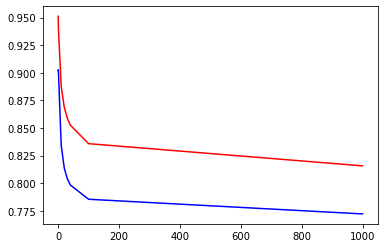

In [106]:
param_a = [0.001, 0.01, 1, 10, 20, 30, 40, 100, 1000]
train_r = []
test_r = []
for i in param_a:
    Model_R = Ridge(alpha=i)
    Model_R.fit(X_train, y_train)
    y_pred_train = Model_R.predict(X_train)
    R2_train = r2_score(y_train, y_pred_train)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test)
    R2_test = r2_score(y_test, y_pred_test)
    test_r.append(R2_test)
plt.plot(param_a, train_r, 'r')
plt.plot(param_a, test_r, 'b')
plt.show()

In [107]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = Ridge(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [108]:
train_rid, test_rid = Manual_Tune(param_a, Model_R, X_train, X_test, y_train, y_test)

In [109]:
#alpha terbaik
param_a[np.argmax(test_rid)]

0.01

# alpha terbaik untuk Ridge yaitu 0.01

In [110]:
Model_R = Ridge(alpha=0.01)

In [111]:
Model_R.fit(X_train, y_train)

Ridge(alpha=0.01)

In [112]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [113]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [114]:
R2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr = Eva_Matrix(Model_R, X_train, y_train)

In [115]:
R2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts = Eva_Matrix(Model_R, X_test, y_test)

In [116]:
data_R = {
    "Train" : [R2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Test" : [R2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts]
}

pd.DataFrame(data = data_R, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512140e-01,9.026307e-01
MAE,1.044162e+03,2.066843e+03
MSE,2.225927e+06,1.191282e+07
RMSE,1.491954e+03,3.451496e+03


# Scalling

In [117]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [118]:
sc = RobustScaler()

In [119]:
df_ML.head()

,aspiration,num-of-doors,engine-location,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,2,0,2548,4,130,9.0,111.0,21,27,13495.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,0,2,0,2548,4,130,9.0,111.0,21,27,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,0,2,0,2823,6,152,9.0,154.0,19,26,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0,4,0,2337,4,109,10.0,102.0,24,30,13950.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,4,0,2824,5,136,8.0,115.0,18,22,17450.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [120]:
df_ML['compression-ratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  8.8 ,  9.5 ,  9.6 ,  9.41,
        9.4 ,  7.6 ,  7.  ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [121]:
num_col = df_ML[['curb-weight', 'num-of-cylinders', 'engine-size', 'compression-ratio' ,'horsepower', 'city-mpg', 'highway-mpg']]

In [122]:
sc_df = sc.fit_transform(num_col)

In [123]:
df_sc = pd.DataFrame(sc_df)

In [124]:
df_fullsc = pd.concat([df_ML,df_sc], axis=1)

In [125]:
df_fullsc.drop(columns=['curb-weight', 'num-of-cylinders', 'engine-size', 'compression-ratio' ,'horsepower', 'city-mpg', 'highway-mpg'], inplace=True)

In [126]:
df_fullsc.head()

,aspiration,num-of-doors,engine-location,price,diesel,gas,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,0,1,2,3,4,5,6
0,0,2,0,13495.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.177015,0.0,0.232558,0.00,0.347826,-0.272727,-0.333333
1,0,2,0,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.177015,0.0,0.232558,0.00,0.347826,-0.272727,-0.333333
2,0,2,0,16500.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.540291,2.0,0.744186,0.00,1.282609,-0.454545,-0.444444
3,0,4,0,13950.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.101717,0.0,-0.255814,1.25,0.152174,0.000000,0.000000
4,0,4,0,17450.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.541612,1.0,0.372093,-1.25,0.434783,-0.545455,-0.888889


# Ridge Model Setelah Di Scalling

In [127]:
# Splitting Data

In [128]:
X_sc = df_fullsc.drop(columns='price')
y_sc = df_fullsc['price']

In [129]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc, y_sc, test_size = 0.20, random_state = 42)

In [130]:
Model_R = Ridge(alpha=0.001)

In [131]:
Model_R.fit(X_train_sc, y_train_sc)

Ridge(alpha=0.001)

In [132]:
R2_Rsc_tr, MAE_Rsc_tr, MSE_Rsc_tr, RMSE_Rsc_tr = Eva_Matrix(Model_R, X_train_sc, y_train_sc)

In [133]:
R2_Rsc_ts, MAE_Rsc_ts, MSE_Rsc_ts, RMSE_Rsc_ts = Eva_Matrix(Model_R, X_test_sc, y_test_sc)

In [134]:
data_Rsc = {
    "Train" : [R2_Rsc_tr, MAE_Rsc_tr, MSE_Rsc_tr, RMSE_Rsc_tr],
    "Test" : [R2_Rsc_ts, MAE_Rsc_ts, MSE_Rsc_ts, RMSE_Rsc_ts]
}

pd.DataFrame(data = data_Rsc, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512219e-01,9.022028e-01
MAE,1.042759e+03,2.071920e+03
MSE,2.225568e+06,1.196518e+07
RMSE,1.491834e+03,3.459072e+03


# Ridge Model Poly Transform

In [135]:
Model_RP = Ridge()

In [136]:
Model_RP.fit(X_train_P2, y_train_P2)

Ridge()

In [137]:
param_a = [0.0001,0.001, 0.01, 1, 10, 20, 30, 40, 100, 1000]

In [138]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = Ridge(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [139]:
train_ridge, test_ridge = Manual_Tune(param_a, Model_RP, X_train_P2, X_test_P2, y_train_P2, y_test_P2)

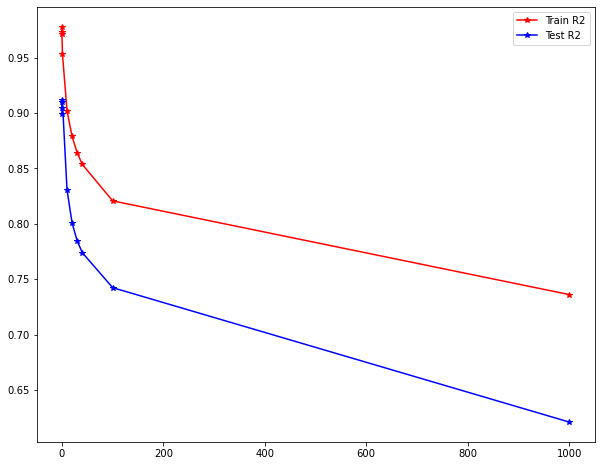

In [140]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_ridge, 'r*-')
plt.plot(param_a, test_ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [141]:
#alpha terbaik
param_a[np.argmax(test_ridge)]


0.01

# alpha terbaik untuk ridge poly adalah 0.01

In [142]:
Model_RP2 = Ridge(alpha = 0.01)

In [143]:
Model_RP2.fit(X_train_P2,y_train_P2)

Ridge(alpha=0.01)

In [144]:
R2_RP_tr, MAE_RP_tr, MSE_RP_tr, RMSE_RP_tr = Eva_Matrix(Model_RP2, X_train_P2, y_train_P2)

In [145]:
R2_RP_ts, MAE_RP_ts, MSE_RP_ts, RMSE_RP_ts = Eva_Matrix(Model_RP2, X_test_P2, y_test_P2)

In [146]:
data_RP = {
    "Train" : [R2_RP_tr, MAE_RP_tr, MSE_RP_tr, RMSE_RP_tr],
    "Test" : [R2_RP_ts, MAE_RP_ts, MSE_RP_ts, RMSE_RP_ts]
}

pd.DataFrame(data = data_RP, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.711321e-01,9.118445e-01
MAE,8.529274e+02,2.158453e+03
MSE,1.317136e+06,1.078554e+07
RMSE,1.147666e+03,3.284135e+03


# Lasso model

In [147]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [148]:
Model_L = Lasso()

In [149]:
Model_L.fit(X_train, y_train)

Lasso()

In [150]:
param_a = [0.0001,0.001, 0.01, 1, 10, 20, 30, 40, 100, 1000]

In [151]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = Lasso(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [152]:
train_Lasso, test_Lasso = Manual_Tune(param_a, Model_L, X_train, X_test, y_train, y_test)

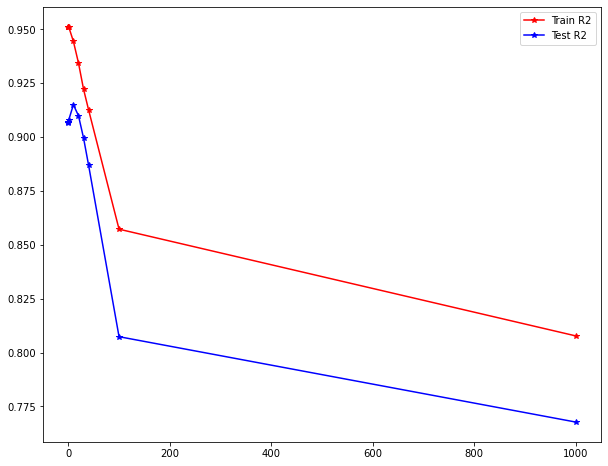

In [153]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Lasso, 'r*-')
plt.plot(param_a, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [154]:
#alpha terbaik
param_a[np.argmax(train_Lasso)]


0.0001

In [155]:
Model_L1 = Lasso(alpha = 0.0001)

In [156]:
Model_L1.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [157]:
R2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr = Eva_Matrix(Model_L1, X_train, y_train)

In [158]:
R2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts = Eva_Matrix(Model_L1, X_test, y_test)

In [159]:
data_L = {
    "Train" : [R2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    "Test" : [R2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts]
}

pd.DataFrame(data = data_L, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512219e-01,9.069122e-01
MAE,1.042605e+03,2.006490e+03
MSE,2.225564e+06,1.138899e+07
RMSE,1.491832e+03,3.374758e+03


# Lasso Model Poly Transform

In [160]:
Model_LP = Lasso()

In [161]:
Model_LP.fit(X_train_P2, y_train_P2)

Lasso()

In [162]:
param_a = [0.0001,0.001, 0.01, 1, 10, 20, 30, 40, 100, 1000]

In [163]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = Lasso(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [164]:
train_Lasso, test_Lasso = Manual_Tune(param_a, Model_L, X_train_P2, X_test_P2, y_train_P2, y_test_P2)

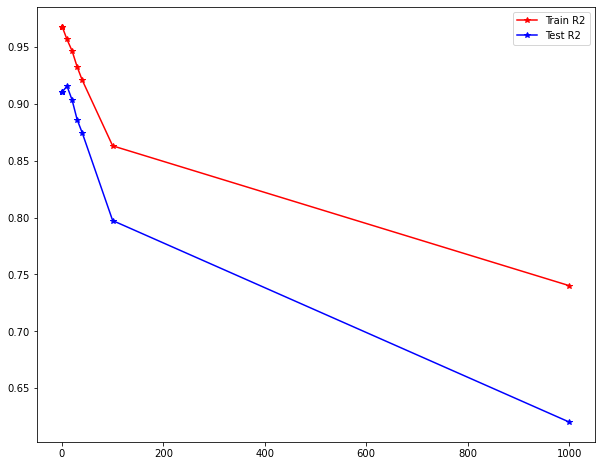

In [165]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Lasso, 'r*-')
plt.plot(param_a, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [166]:
#alpha terbaik
param_a[np.argmax(test_Lasso)]


10

# alpha terbaik untuk lasso poly adalah 10

In [167]:
Model_LP2 = Lasso(alpha = 10)

In [168]:
Model_LP2.fit(X_train_P2,y_train_P2)

Lasso(alpha=10)

In [169]:
R2_LP_tr, MAE_LP_tr, MSE_LP_tr, RMSE_LP_tr = Eva_Matrix(Model_LP2, X_train_P2, y_train_P2)

In [170]:
R2_LP_ts, MAE_LP_ts, MSE_LP_ts, RMSE_LP_ts = Eva_Matrix(Model_LP2, X_test_P2, y_test_P2)

In [171]:
data_LP = {
    "Train" : [R2_LP_tr, MAE_LP_tr, MSE_LP_tr, RMSE_LP_tr],
    "Test" : [R2_LP_ts, MAE_LP_ts, MSE_LP_ts, RMSE_LP_ts]
}

pd.DataFrame(data = data_L, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512219e-01,9.069122e-01
MAE,1.042605e+03,2.006490e+03
MSE,2.225564e+06,1.138899e+07
RMSE,1.491832e+03,3.374758e+03


# Enet Model

In [172]:
Model_E = ElasticNet()

In [173]:
Model_E.fit(X_train, y_train)

ElasticNet()

In [174]:
param_a = [0.0001,0.001, 0.01, 1, 10, 20, 30, 40, 100, 1000]

In [175]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = ElasticNet(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [176]:
train_Enet, test_Enet = Manual_Tune(param_a, Model_E, X_train, X_test, y_train, y_test)

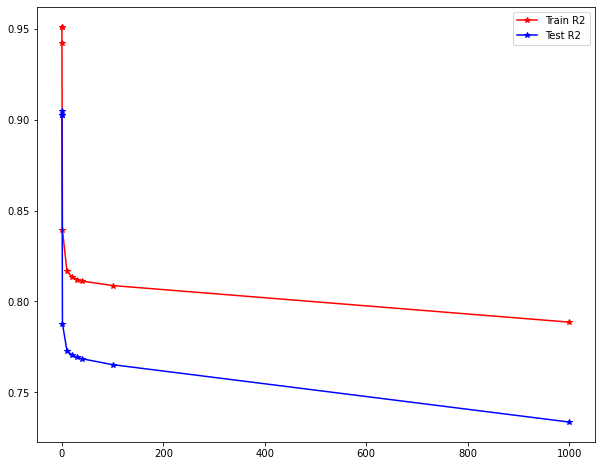

In [177]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Enet, 'r*-')
plt.plot(param_a, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [178]:
#alpha terbaik
param_a[np.argmax(test_Enet)]


0.001

# alpha terbaik untuk Enet adalah 0.001

In [179]:
Model_E1 = ElasticNet(alpha = 0.001)

In [180]:
Model_E1.fit(X_train,y_train)

ElasticNet(alpha=0.001)

In [181]:
R2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr = Eva_Matrix(Model_E1, X_train, y_train)

In [182]:
R2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts = Eva_Matrix(Model_E1, X_test, y_test)

In [183]:
data_E = {
    "Train" : [R2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr],
    "Test" : [R2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts]
}

pd.DataFrame(data = data_E, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.508537e-01,9.050495e-01
MAE,1.055149e+03,2.035150e+03
MSE,2.242365e+06,1.161689e+07
RMSE,1.497453e+03,3.408356e+03


# Enet Model Poly Transform

In [184]:
Model_EP = ElasticNet()

In [185]:
Model_EP.fit(X_train_P2, y_train_P2)

ElasticNet()

In [186]:
param_a = [0.0001,0.001, 0.01, 1, 10, 20, 30, 40, 100, 1000]

In [187]:
def Manual_Tune(Alpha, Model, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = ElasticNet(alpha=i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [188]:
train_Enet, test_Enet = Manual_Tune(param_a, Model_EP, X_train_P2, X_test_P2, y_train_P2, y_test_P2)

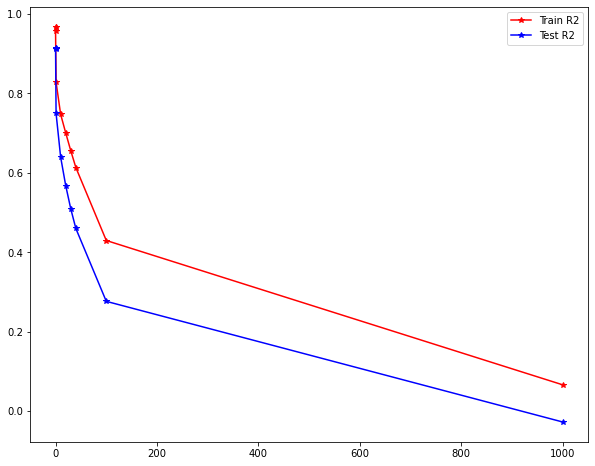

In [189]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Enet, 'r*-')
plt.plot(param_a, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [190]:
#alpha terbaik
param_a[np.argmax(test_Enet)]


0.0001

# alpha terbaik untuk ElasticNet poly adalah 0.0001

In [191]:
Model_EP2 = ElasticNet(alpha = 0.0001)

In [192]:
Model_EP2.fit(X_train_P2,y_train_P2)

ElasticNet(alpha=0.0001)

In [193]:
R2_EP_tr, MAE_EP_tr, MSE_EP_tr, RMSE_EP_tr = Eva_Matrix(Model_EP2, X_train_P2, y_train_P2)

In [194]:
R2_EP_ts, MAE_EP_ts, MSE_EP_ts, RMSE_EP_ts = Eva_Matrix(Model_EP2, X_test_P2, y_test_P2)

In [195]:
data_EP = {
    "Train" : [R2_EP_tr, MAE_EP_tr, MSE_EP_tr, RMSE_EP_tr],
    "Test" : [R2_EP_ts, MAE_EP_ts, MSE_EP_ts, RMSE_EP_ts]
}

pd.DataFrame(data = data_L, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train,Test
R2,9.512219e-01,9.069122e-01
MAE,1.042605e+03,2.006490e+03
MSE,2.225564e+06,1.138899e+07
RMSE,1.491832e+03,3.374758e+03


# Conclusion Machine Learning :
## Untuk Model Machine Learning yang memiliki hasil terbaik untuk menebak harga mobil yaitu :
- **Base Model Ridge :**
    - Nilai R2 train : 9.395397e-01 dan R2 test : 9.001467e-01
    - Nilai MAE train : 1.209527e+03 dan MAE test : 2.107464e+03
    - Nilai MSE train : 2.758581e+06 dan MSE test : 1.221673e+07
    - Nilai RMSE train : 1.660898e+03 dan RMSE test : 3.495244e+03